In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
class Polynomial:
    def __init__(self, coefficients):
        self.coefficients = list(coefficients)
        self.degree = len(self.coefficients) - 1
    
    def __str__(self):
        s = "Coefficients of the polynomial are:\n"
        return s + ' '.join(map(str,self.coefficients))
    
    def __add__(self,other):
        self.coefficients += [0] * (len(other.coefficients) - len(self.coefficients))
        other.coefficients += [0] * (len(self.coefficients) - len(other.coefficients))
        result = [x + y for x,y in zip(self.coefficients,other.coefficients)]
        return Polynomial(result)
    
    def __sub__(self,other):
        self.coefficients += [0] * (len(other.coefficients) - len(self.coefficients))
        other.coefficients += [0] * (len(self.coefficients) - len(other.coefficients))
        result = [x - y for x,y in zip(self.coefficients,other.coefficients)]
        return Polynomial(result)
    
    def __mul__(self,scalar):
        if isinstance(scalar,Polynomial):
            result_elements = [0] * (len(self.coefficients) + len(scalar.coefficients) - 1)
            for i, x in enumerate(self.coefficients):
                for j, y in enumerate(scalar.coefficients):
                    result_elements[i + j] += x * y
        else:
            result_elements = [x * scalar for x in self.coefficients]
            
        return Polynomial(result_elements)
    
    def __rmul__(self,scalar):
        return self.__mul__(scalar)
    
    def __getitem__(self,num):
        res = 0
        for i,x in enumerate(self.coefficients):
            res += x*(num**i)
        return res
    
    def show(self,a,b):
        x = np.linspace(a, b, 100)

        # Evaluate the polynomial for each x value
        y = [self[x_val] for x_val in x]

        def generate_polynomial(self):

            result = ""
            op = ""
            for i, coeff in enumerate(self.coefficients):
                if coeff == 0:
                    continue
                op = " - " if coeff < 0 else " + "
                result += (op if result != "" else "") + (str(coeff) if abs(coeff) != 1 or i == 0 else "") + ("x" + ("^" if i != 1 else "") + (str(i) if i != 1 else "") if i != 0 else "") 
            return result
    

        p_x = generate_polynomial(self) 
        if p_x == "":
            p_x = "0"

        # Plot the polynomial
        plt.plot(x, y)
        plt.xlabel('$x$')
        plt.ylabel('$P(x)$')
        plt.title(f"Plot é of the polynomial ${p_x}$")
        plt.grid(True)
        plt.show()

    def shownew(self,a,b,points,flag=1):

        x = np.linspace(a,b,100)

        if flag == 1:
            y = np.polyval(np.flip(self.coefficients),x)
            method = 'matrix method'
        else:
            y = np.polyval(self.coefficients,x)
            method = 'Lagrange polynomial'
        
        plt.plot(x,y)
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('ƒ(x)')
        plt.title('Polynomial interpolation using '+ method)
        x,y = zip(*points)
        plt.scatter(x,y, color='r')
        plt.show()
    
    def fitViaMatrixMethod(self,points):
        A = np.zeros((len(points),len(points)))
        b = np.zeros(len(points))

        for i,(x,y) in enumerate(points):
            for j in range(len(points)):
                A[i][j] = x**j
            b[i] = y
        
        self.coefficients = np.linalg.solve(A,b)
        p = Polynomial(self.coefficients)

        p.shownew(min([p[0] for p in points]),max([p[0] for p in points]), points)
            
    def fitViaLagrangePoly(self,points):
        p = Polynomial([0.0])

        for i in range(len(points)):
            lgrng = Polynomial([points[i][1]])
            for j in range(len(points)):
                if i!=j:
                    xi,xj = points[i][0], points[j][0]
                    lgrng = lgrng*Polynomial([1/(xi-xj),-xj/(xi-xj)])
            
            p = p + lgrng
        
        p.shownew(min([p[0] for p in points]),max([p[0] for p in points]), points,0)

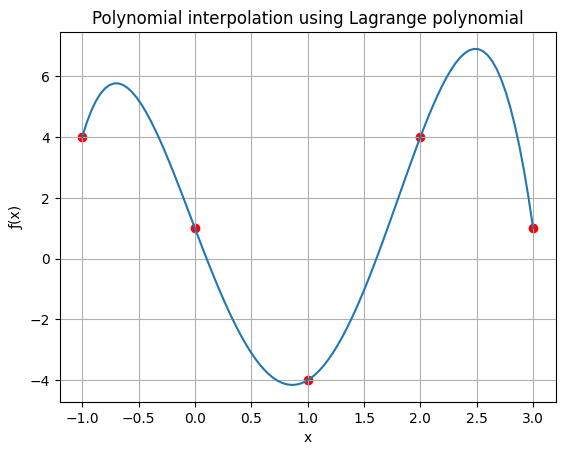

In [25]:
p = Polynomial([])
p.fitViaLagrangePoly([(1,-4), (0,1), (-1, 4), (2, 4), (3,1)])